In [ ]:
pip install tensorflow

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Scale the data (important for NN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data (last 20% for test)
split = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:split], X_scaled[split:]
y_train, y_test = y[:split], y[split:]

# Build the NN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Regression output
])

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_percentage_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=0)


c:\Users\MuriloFarias\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


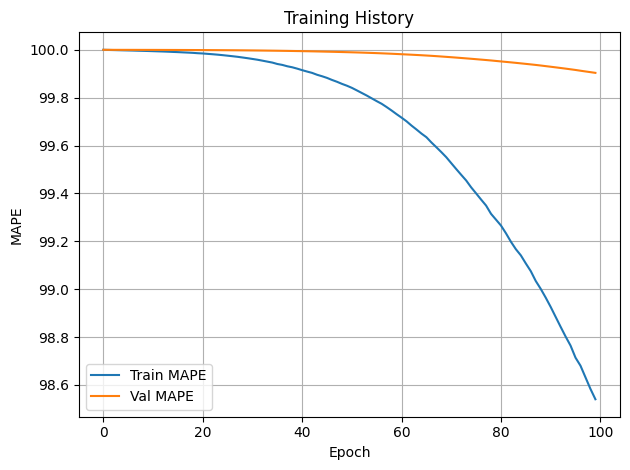

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train MAPE')
plt.plot(history.history['val_loss'], label='Val MAPE')
plt.title('Training History')
plt.ylabel('MAPE')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
y_pred = model.predict(X_test).flatten()
mape_nn = mean_absolute_percentage_error(y_test, y_pred)

print(f"📐 NN Avg. MAPE: {mape_nn:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
📐 NN Avg. MAPE: 0.9998
